# Tarefa 2: implementação de um classificador linear

## Nesta tarefa você deverá implementar um Classificador Linear e ajustá-lo aos dados em anexo. Mediremos o desempenho por meio da Acurácia nos próprios dados (o que é um erro, mas veremos maneiras melhores em semanas posteriores). Seu objetivo é encontrar o ajuste com a maior acurácia possível.

* Você pode utilizar a linguagem de programação que desejar;
* A implementação não deve utilizar bibliotecas que implementam a técnica diretamente, mas bibliotecas que auxiliem no processo podem ser usadas (e.g. bibliotecas numéricas);
* Você deve entregar no e-aula o código-fonte e um relatório curto mostrando o resultado e os parâmetros do modelo;
* Em adição, a acurácia obtida deverá ser digitada neste formulário: https://docs.google.com/forms/d/e/1FAIpQLSd5wxBITO8fDvUNvscpmk5c3L4i4wb5KxUlSeQQbaIgfPkq9Q/viewform?usp=sf_link
* Um ranking com as acurácias obtidas será publicado no e-aula posteriormente.

### Importando pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Análise do Dataset

In [4]:
dataset = pd.read_csv("../Datasets/dogs_cats.csv")
dataset = dataset.loc[:, ['comprimento', 'peso', 'classe']]

In [16]:
dataset

,comprimento,peso,classe
0,45.231415,431.548671,cachorro
1,38.003753,517.870914,gato
2,53.608592,444.025762,cachorro
3,39.315731,524.066579,gato
4,45.581301,450.552000,cachorro
...,...,...,...
1995,37.590457,587.274926,gato
1996,43.818870,416.846089,cachorro
1997,36.876470,483.215531,gato
1998,49.415613,514.637485,cachorro


In [51]:
dataset.describe()

,comprimento,peso
count,2000.000000,2000.000000
mean,45.333692,528.115349
std,6.654831,74.081920
min,25.447014,281.452391
25%,40.386562,478.410031
50%,45.508933,524.830624
75%,50.160534,575.425169
max,64.303254,786.648409


In [9]:
dataset['classe'].value_counts()

gato        1000
cachorro    1000
Name: classe, dtype: int64

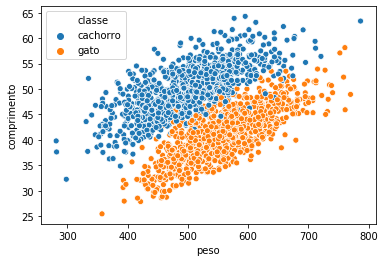

In [12]:
sns.scatterplot(data=dataset, x='peso', y='comprimento', hue='classe')

### Entrada

In [30]:
X = dataset.loc[:, ['comprimento', 'peso']]
X = X.to_numpy().T
X

array([[ 45.23141496,  38.00375264,  53.60859154, ...,  36.87647029,
         49.41561264,  37.64040028],
       [431.54867128, 517.87091377, 444.02576183, ..., 483.21553099,
        514.63748468, 548.74690568]])

In [31]:
X.shape

(2, 2000)

### Saída

In [32]:
Y = dataset.loc[:, ['classe']]
Y = Y.replace({'gato': 0, 'cachorro': 1})
Y = Y.to_numpy().T
Y

array([[1, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [33]:
Y.shape

(1, 2000)

### Parâmetros a serem treinados

In [52]:
def define_parametros():
  w = np.zeros((2,1))
  b = 0
  return w, b

In [41]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [53]:
def calcula_custo(A, Y):
  m = Y.shape[1]
  
  custo = Y * np.log(A) + (1-Y) * np.log(1-A)
  custo = np.sum(custo)
  custo = -1/m * custo
  
  return custo

def calcula_gradientes(X, Y, A):
  m = X.shape[1]
  diff = A - Y
  
  
  dw = np.dot(X, diff.T)
  dw = 1/m * dw
  
  db = np.sum(diff)
  db = 1/m * db
  
  return {
    'dw': dw,
    'db': db,
  }

def calcula_acuracia(w, b, X, Y, threshold=0.5):
  
  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)
  
  acertos = 0
  for i in range(A.shape[1]):
    
    valor = 0
    if A[0,i] >= threshold:
      valor = 1
    
    if Y[0,i] == valor:
      acertos += 1
  
  acuracia = acertos/A.shape[1]
  return acuracia

In [43]:
def propaga(w, b, X, Y):
  
  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)
  custo = calcula_custo(A, Y)
  gradientes = calcula_gradientes(X, Y, A)
  
  return gradientes, custo

In [56]:
def otimizacao(w, b, X, Y, n_iter, lr):
  
  custos = []
  for i in range(n_iter):
    
    gradiente, custo = propaga(w, b, X, Y)

    dw, db = gradiente['dw'], gradiente['db']
    w, b = w - (lr * dw), b - (lr * db)
    
    if i % 100 == 0:
      custos.append(custo)
      print('custo na iteração %d: %f' % (i, custo))
  
  if i % 100 != 0:
    custos.append(custo)
    
  return w, b, custos

In [58]:
def model(X, Y, n_iter=2000, lr=0.5):
  
  w, b = define_parametros()
  w, b, custos = otimizacao(w, b, X, Y, n_iter, lr)
  acuracia = calcula_acuracia(w, b, X, Y)
  
  print('----------------')
  print('Custo final:', custos[-1])
  print("Acurácia:", acuracia)
  
  data = {
    'w': w,
    'b': b,
    'custos': custos,
    'acuracia': acuracia,
    'n_iter': n_iter,
    'lr': 0.5,
  }
  
  return data

In [59]:
model(X,Y)

custo na iteração 0: 0.693147
custo na iteração 100: 0.172824
custo na iteração 200: 0.101480
custo na iteração 300: 0.070617
custo na iteração 400: 0.053765
custo na iteração 500: 0.043255
custo na iteração 600: 0.036111
custo na iteração 700: 0.030955
custo na iteração 800: 0.027066
custo na iteração 900: 0.024032
custo na iteração 1000: 0.021601
custo na iteração 1100: 0.019611
custo na iteração 1200: 0.017953
custo na iteração 1300: 0.016551
custo na iteração 1400: 0.015350
custo na iteração 1500: 0.014310
custo na iteração 1600: 0.013400
custo na iteração 1700: 0.012599
custo na iteração 1800: 0.011887
custo na iteração 1900: 0.011250
----------------
Custo final: 0.010683789954375017
Acurácia: 1.0


{'w': array([[-10.37204924],
        [  2.0925977 ]]),
 'b': 8.0684523308416,
 'custos': [0.6931471805599452,
  0.17282372757651843,
  0.10148043445377547,
  0.07061698335111702,
  0.05376546287075379,
  0.043254939500963686,
  0.036110726627621624,
  0.030954640750290866,
  0.027065683889130103,
  0.02403180377664281,
  0.02160113236769221,
  0.019611355531565282,
  0.01795331197843146,
  0.016550960937887077,
  0.015349749527751368,
  0.014309548161194851,
  0.013400194136796302,
  0.012598587384714331,
  0.011886743475269294,
  0.011250455633325034,
  0.010683789954375017],
 'acuracia': 1.0,
 'n_iter': 2000,
 'lr': 0.5}